# Visualization with Matplotlib and Seaborn

We previously looked at an introduction to NumPy and Pandas, which are the two core Python libraries for handling data. Here we'll look at Matplotlib and Seaborn as visualization tools.

Numpy is a core package for handling array-based data, and Pandas builds on NumPy to provide operations which work quickly on labeled data. Analogously, matplotlib is a core package which makes use of NumPy arrays for visualization, and Seaborn builds on Matplotlib to provide operations which work on Pandas data.

Thus, we'll start with a quick intro to the basics of Matplotlib before moving on to show how Seaborn makes your life easier.

## Matplotlib

The [matplotlib](http://matplotlib.org) library is a powerful tool capable of producing complex publication-quality figures with fine layout control in two and three dimensions; here we will only provide a minimal self-contained introduction to its usage that covers the functionality needed for the rest of the section.

Just as we typically use the shorthand `np` for Numpy, we will use `plt` for the `matplotlib.pyplot` module where the easy-to-use plotting functions reside (the library also contains a rich object-oriented architecture that we don't have the space to discuss here):

In [1]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Here we'll go through just the basics of using matplotlib to create visualizations in Python.

### The ``plot`` command:

Basic plots can be created with the ``plt.plot`` command:

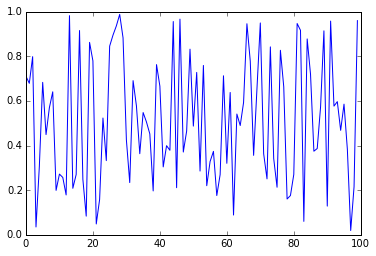

In [2]:
plt.plot(np.random.rand(100));

#### Plotting a function: $f(x) = \sin(x)$

Above we called ``plt.plot(y)``; we can also call ``plt.plot(x, y)``:

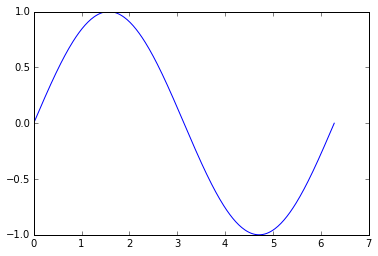

In [3]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x)
plt.plot(x, y);

#### Titles, labels, etc.

The ``plt.plot()`` function is a real workhorse: you can use it for line plots, scatter plots, plotting of multiple lines at one time, etc. By adding other ``plt`` functions, you can add other plot elements as well.

Here is how you can make a simple plot of $\sin(x)$ and $\sin(x^2)$ for $x \in [0, 2\pi]$ with labels and a grid (we use the semicolon in the last line to suppress the display of some information that is unnecessary right now):

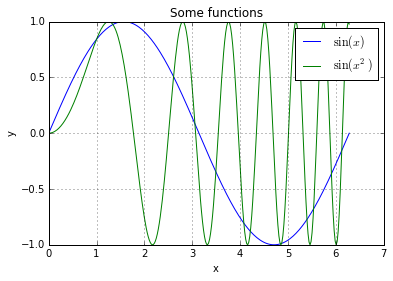

In [4]:
y2 = np.sin(x**2)
plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, y2, label=r'$\sin(x^2)$')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

#### Controlling lines and markers

You can control the style, color and other properties of the markers, for example:

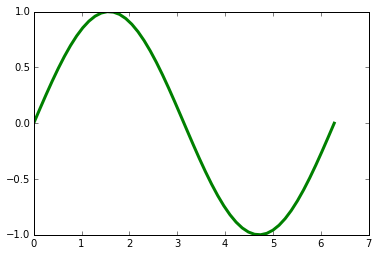

In [5]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
plt.plot(x, y, linewidth=3, color='green');

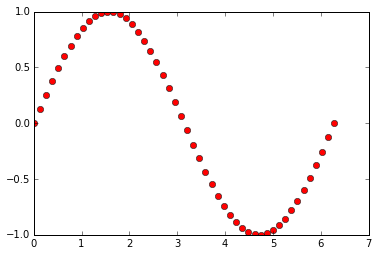

In [6]:
plt.plot(x, y, 'o', markersize=6, color='r');

There is much more that can be done with the simple ``plt.plot`` function; for help, take a look at the documentation using IPython's ``?`` functionality:

In [7]:
plt.plot?

### Other plot types

Other plot types can be made using other top-level matplotlib commands:

#### Errorbars

We will now see how to create a few other common plot types, such as a simple error plot:

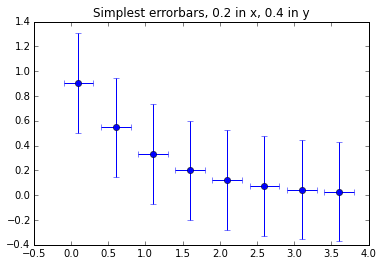

In [8]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4, fmt='o')
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y");

#### Log plots

Logarithmic scales can be used by calling ``plt.semilogx``, ``plt.semilogy``, and ``plt.loglog``:

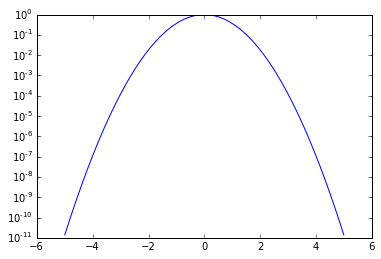

In [9]:
x = np.linspace(-5, 5)
y = np.exp(-x**2)
plt.semilogy(x, y);

#### Histograms

A histogram can be created using the ``plt.hist(x, bins)`` function.
Here we'll also add some labels and grid lines to the histogram:

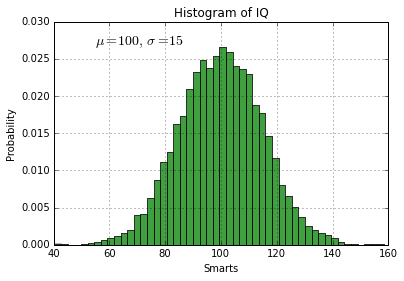

In [10]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# This will put a text fragment at the position given:
plt.text(55, .027, r'$\mu=100,\ \sigma=15$', fontsize=14)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

#### Two-dimensional arrays & images

Two-dimensional data and images can be plotted using ``plt.imshow``:

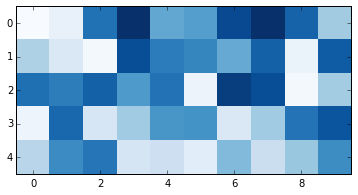

In [11]:
plt.imshow(np.random.rand(5,10), interpolation='nearest', cmap='Blues');

Images can be shown in very flexible ways. For example, it can even handle RGB tuples at each point:

In [12]:
img = plt.imread('images/stoplight.png')
img.shape

(387, 310, 3)

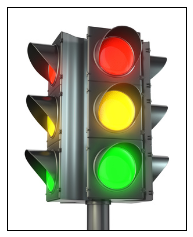

In [13]:
plt.imshow(img)
plt.xticks([])
plt.yticks([]);

#### Subplots

Let's create some subplots and plot the R, G, B channels in the image separately

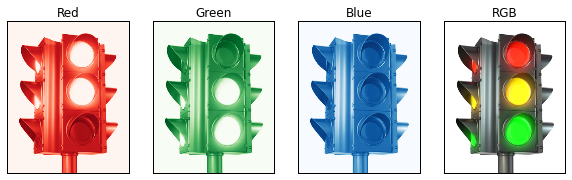

In [14]:
fig, ax = plt.subplots(1, 4, figsize=(10,6),
                       subplot_kw=dict(xticks=[], yticks=[]))

for i, cmap in enumerate(['Red', 'Green', 'Blue']):
    ax[i].imshow(img[:,:,i], cmap=cmap + 's_r')
    ax[i].set_title(cmap)
ax[3].imshow(img)
ax[3].set_title('RGB');

#### Simple 3d plotting

Matplotlib is mostly designed for two-dimensional plots, but it also has some three-dimensional plotting capabilities.

For 3D plots, you must import the 3D toolkit as follows:

In [15]:
from mpl_toolkits.mplot3d import Axes3D

One this has been done, you can create 3d axes with the `projection='3d'` keyword to `add_subplot`:

    fig = plt.figure()
    fig.add_subplot(...,
                    projection='3d')

Here is a simple 3D surface plot:

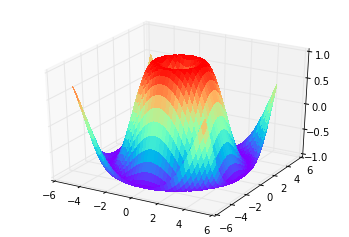

In [16]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow',
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01);

### Finding More: The Matplotlib Gallery

There is much, much more that matplotlib can do: we've just scratched the surface here. For more info, check out the [matplotlib documentation](), and especially the [matplotlib gallery](http://matplotlib.sourceforge.net/gallery.html)

One of the most useful ways to learn how to use matplotlib is to search the gallery for a plot that you're interested in, and then load the code using IPython's ``%load`` magic. Then you can run, modify, and experiment with the code:

In [17]:
# %load http://matplotlib.org/mpl_examples/pie_and_polar_charts/polar_scatter_demo.py

## Seaborn

Matplotlib is a useful tool, but it leaves much to be desired. There are several valid complaints about matplotlib that often come up:

- Matplotlib's defaults are not exactly the best choices. It was based off of MatLab circa 1999, and this shows.
- Matplotlib is relatively low-level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib is not designed for use with Pandas dataframes. In order to visualize data from a Pandas dataframe, you must extract each series and often concatenate these series' together into the right format.

The answer to these problems is [seaborn](http://stanford.edu/~mwaskom/software/seaborn/). Seaborn provides an API on top of matplotlib which uses sane plot & color defaults, uses simple functions for common statistical plot types, and which integrates with the functionality provided by Pandas dataframes.

Let's take a look at seaborn in action. We'll start by importing seaborn, which by convention is imported as ``sns``.

We can set the seaborn style as the default matplotlib style by calling ``sns.set()``: after doing this, even simple matplotlib plots will look much better.
Let's look at a before and after:

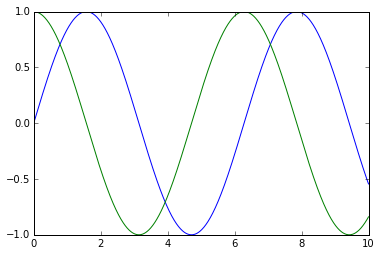

In [18]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), x, np.cos(x));

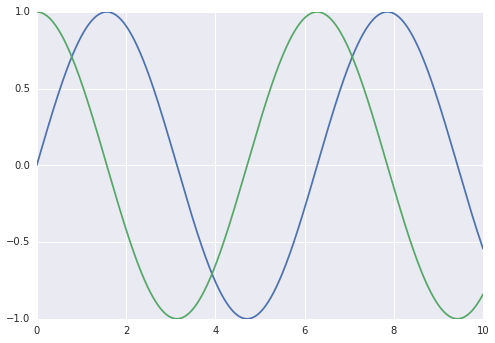

In [19]:
import seaborn as sns
sns.set(color_codes=True)
plt.plot(x, np.sin(x), x, np.cos(x));

Ah, much better!

### Exploring Seaborn Plots

The main idea of Seaborn is that it can create complicated plot types from Pandas data with relatively simple commands.

Let's take a look at a few of the datasets and plot types available in seaborn. Note that all o the following *could* be done using raw matplotlib commands (this is, in fact, what seaborn does under the hood) but the seaborn API is much more convenient.

#### Histograms, KDE, and Densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
Matplotlib provides simple tools to make this happen:

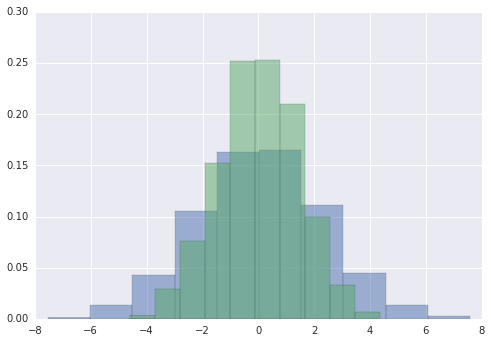

In [20]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation:

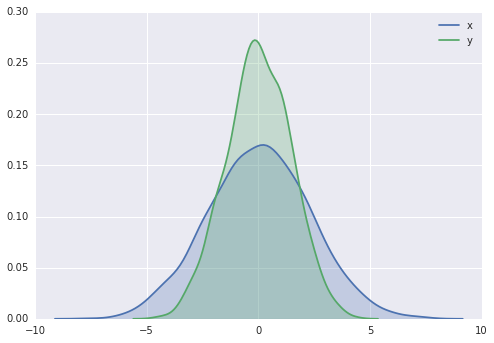

In [21]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using ``distplot``:

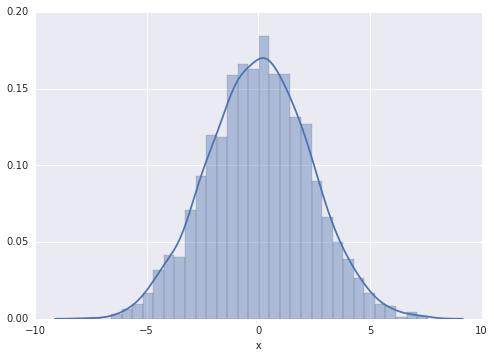

In [22]:
sns.distplot(data['x']);

If we pass the two variables to ``kdeplot``, we will get a bivariate visualization of the data:

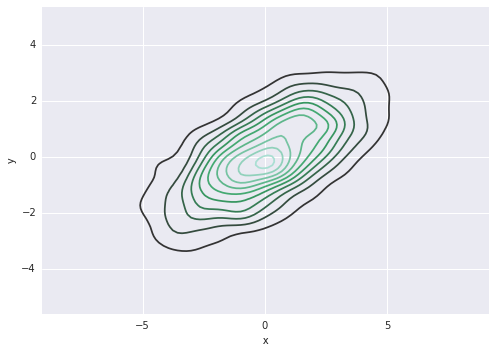

In [23]:
sns.kdeplot(data["x"], data["y"]);

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

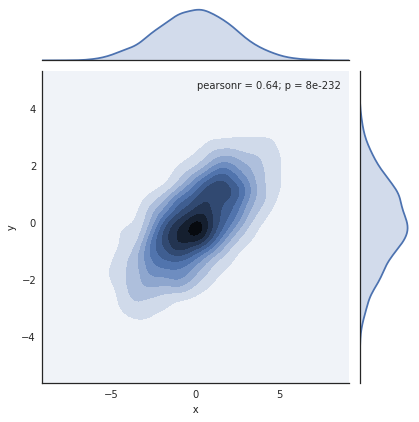

In [24]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters which can be passed to ``jointplot``: for example, we can use a hexagonally-based histogram instead:

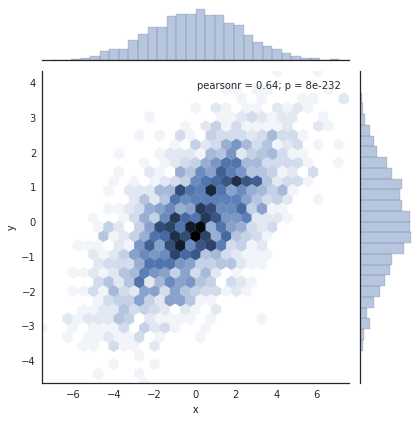

In [25]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

#### Pairplots

When you generalize joint plots to data sets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multi-dimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known *iris* dataset, which lists measurements of petals and sepals of three iris species:

In [26]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multi-dimensional relationships among the samples is as easy as calling ``sns.pairplot``:

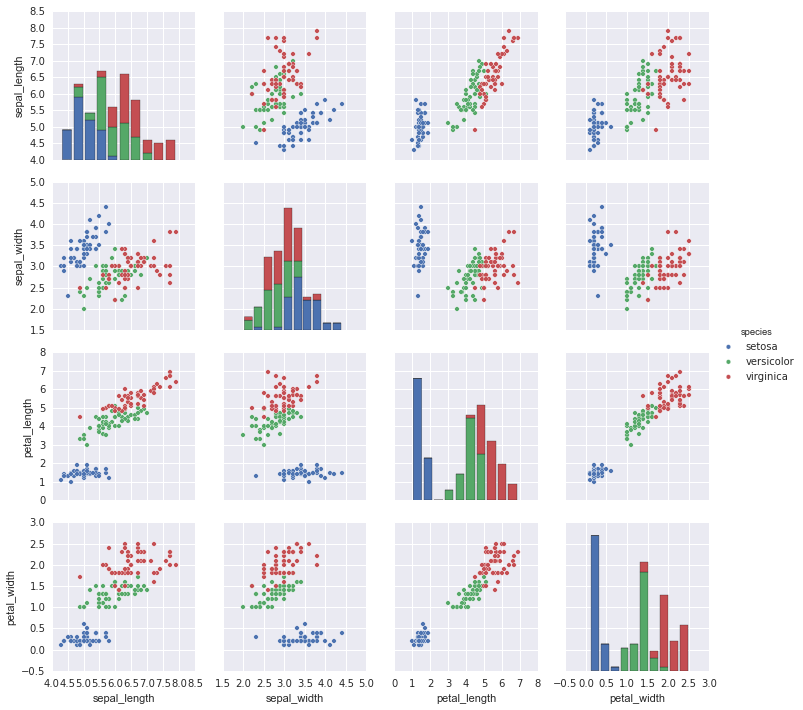

In [27]:
sns.pairplot(iris, hue='species');

#### Faceted Histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data which shows the amount that restaurant staff receive in tips based on various indicator data:

In [28]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


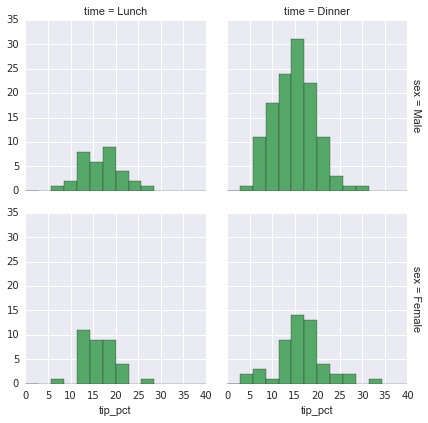

In [29]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15), color="g");

#### Factor Plots

Factor plots can be used to visualize this data as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

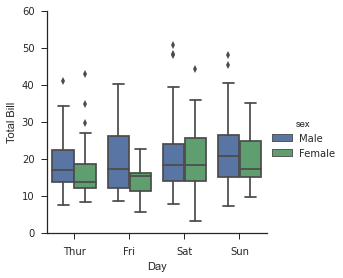

In [30]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint Distributions

Similar to the pairplot we saw above, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

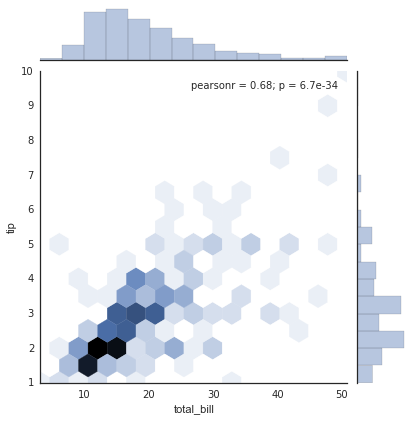

In [31]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

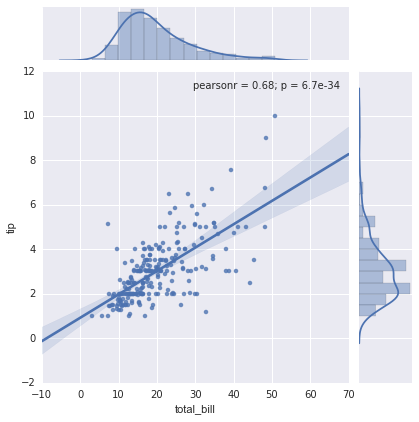

In [32]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

#### Bar Plots

Time series can be plotted using ``sns.factorplot``:

In [33]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


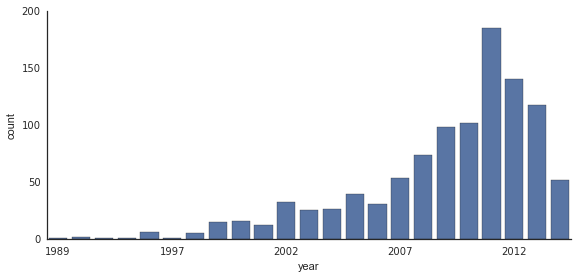

In [34]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2, kind="count", color="b")
    g.set_xticklabels(step=5)

We can learn more by looking at the **method** of discovery of each of these planets:

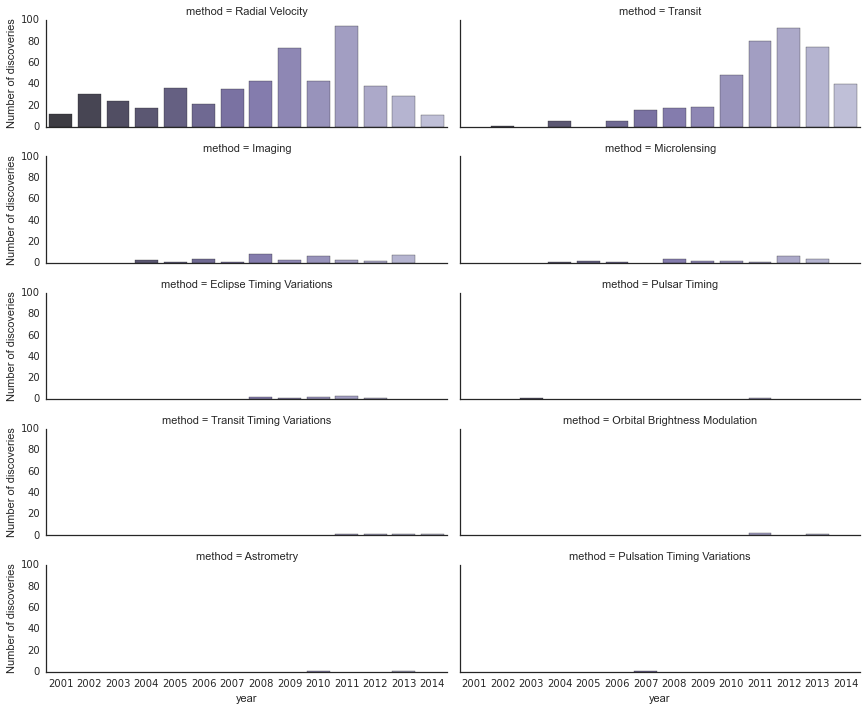

In [35]:
with sns.axes_style('white'):
    methods = planets["method"].value_counts().index
    g = sns.factorplot("year", col='method', col_wrap=2, data=planets, kind="count",
                       size=2, aspect=3, palette="Purples_d",
                       order=range(2001, 2015), col_order=methods)
    g.set_ylabels('Number of discoveries')

For more information on plotting with Seaborn, see the [seaborn documentation](http://stanford.edu/~mwaskom/software/seaborn), the [seaborn gallery](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html), and the official [seaborn tutorial](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html).

## Example: Exploring New York City Marathon Data

*Download this data at https://www.dropbox.com/s/tfy7ygsih7go37j/NYCMresults_2008.csv*

*Move the file into the ``data`` directory to use it below*

In [36]:
nyc_data = pd.read_csv('data/NYCMresults_2008.csv')
nyc_data.head()

,MARILSON,GOMES DOS SANTOS,31,M,1:06:07,2:08:43
0,ABDERRAHIM,GOUMRI,32,M,1:06:06,2:09:07
1,DANIEL,RONO,30,M,1:06:06,2:11:22
2,PAUL,TERGAT,39,M,1:06:06,2:13:10
3,ABDERRAHIME,BOURAMDANE,30,M,1:06:06,2:13:33
4,ABDI,ABDIRAHMAN,31,M,1:06:06,2:14:17


In [37]:
nyc_data.dtypes

MARILSON            object
GOMES DOS SANTOS    object
31                   int64
M                   object
1:06:07             object
2:08:43             object
dtype: object

We see that Pandas assumed the first row was column labels. Also, we see that the times are of dtype "object".
Let's fix both of these by providing a list of column names, and by providing a converter for the times:

In [38]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)

nyc_data = pd.read_csv('data/NYCMresults_2008.csv',
                       names=['first', 'last', 'age', 'gender', 'split', 'final'],
                       converters={'split':convert_time, 'final':convert_time})
nyc_data.head()

,first,last,age,gender,split,final
0,MARILSON,GOMES DOS SANTOS,31,M,01:06:07,02:08:43
1,ABDERRAHIM,GOUMRI,32,M,01:06:06,02:09:07
2,DANIEL,RONO,30,M,01:06:06,02:11:22
3,PAUL,TERGAT,39,M,01:06:06,02:13:10
4,ABDERRAHIME,BOURAMDANE,30,M,01:06:06,02:13:33


That looks much better. For the purpose of our seaborn utilities, let's add columns which give the times in seconds:

In [39]:
nyc_data['split_sec'] = nyc_data['split'].astype(int) / 1E9
nyc_data['final_sec'] = nyc_data['final'].astype(int) / 1E9

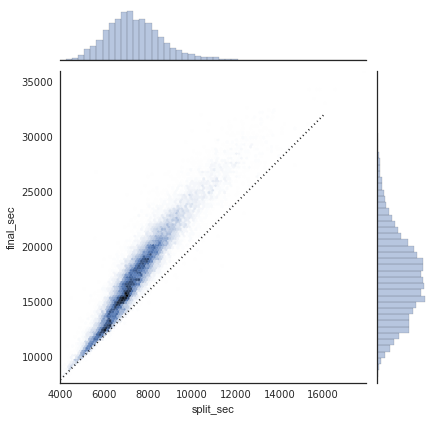

In [40]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", nyc_data, kind='hex', stat_func=None)
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.

Let's create another column in the data, the split fraction, which tells whether someone did a negative split or positive split:

In [41]:
nyc_data['split_frac'] = 1 - 2 * nyc_data['split_sec'] / nyc_data['final_sec']
nyc_data.head()

,first,last,age,gender,split,final,split_sec,final_sec,split_frac
0,MARILSON,GOMES DOS SANTOS,31,M,01:06:07,02:08:43,3967,7723,-0.027321
1,ABDERRAHIM,GOUMRI,32,M,01:06:06,02:09:07,3966,7747,-0.023880
2,DANIEL,RONO,30,M,01:06:06,02:11:22,3966,7882,-0.006344
3,PAUL,TERGAT,39,M,01:06:06,02:13:10,3966,7990,0.007259
4,ABDERRAHIME,BOURAMDANE,30,M,01:06:06,02:13:33,3966,8013,0.010109


Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction:

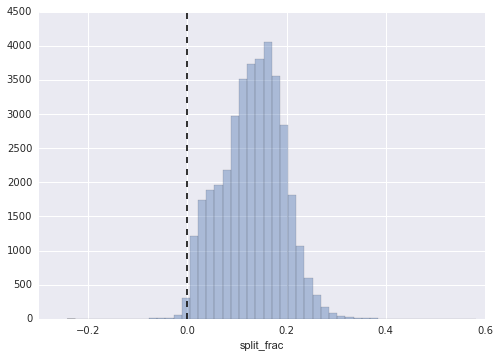

In [42]:
sns.distplot(nyc_data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [43]:
sum(nyc_data.split_frac < 0)

240

There were 240 people who negative-split their race.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a `PairGrid`:

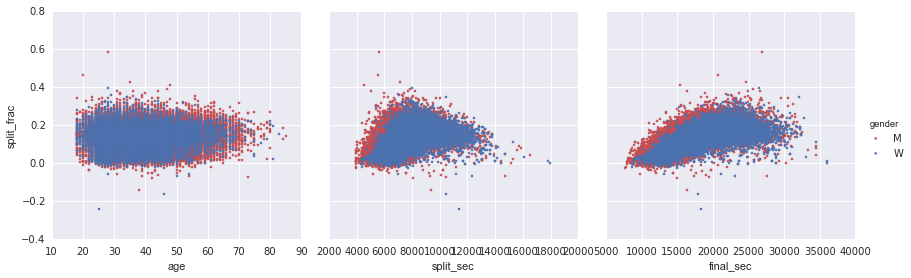

In [44]:
g = sns.PairGrid(nyc_data,
                 x_vars=['age', 'split_sec', 'final_sec'],
                 y_vars=['split_frac'],
                 hue='gender', palette=['r', 'b'], size=4)
g.map(plt.scatter, marker='.')
g.add_legend();

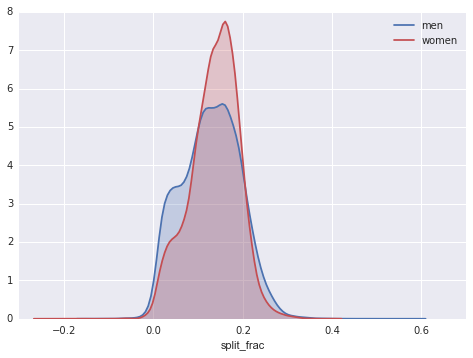

In [45]:
sns.kdeplot(nyc_data.split_frac[nyc_data.gender=='M'], label='men', color='b', shade=True)
sns.kdeplot(nyc_data.split_frac[nyc_data.gender=='W'], label='women', color='r', shade=True)
plt.xlabel('split_frac');

The interesting thing here is that there are many more men than women who are running close to an even split!
This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a *Violin Plot*

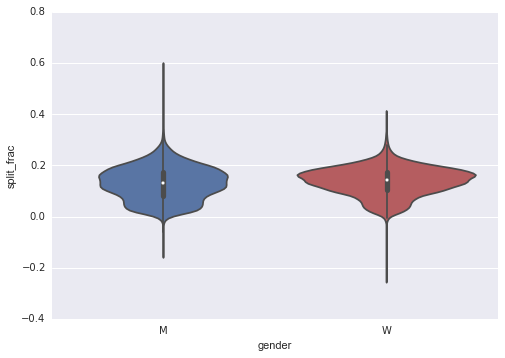

In [46]:
def age_range(age_min, age_max):
    return (nyc_data.age >= age_min) & (nyc_data.age < age_max)

sns.violinplot("gender", "split_frac", data=nyc_data, palette=["b", "r"]);

This is yet another way to view the distributions among men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array which specifies the decade of age that each person is in:

In [47]:
nyc_data['age_dec'] = nyc_data.age.map(lambda age: 10 * (age // 10))
nyc_data.head()

,first,last,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,MARILSON,GOMES DOS SANTOS,31,M,01:06:07,02:08:43,3967,7723,-0.027321,30
1,ABDERRAHIM,GOUMRI,32,M,01:06:06,02:09:07,3966,7747,-0.023880,30
2,DANIEL,RONO,30,M,01:06:06,02:11:22,3966,7882,-0.006344,30
3,PAUL,TERGAT,39,M,01:06:06,02:13:10,3966,7990,0.007259,30
4,ABDERRAHIME,BOURAMDANE,30,M,01:06:06,02:13:33,3966,8013,0.010109,30


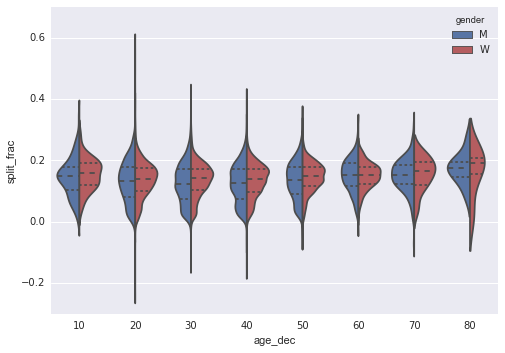

In [48]:
sns.violinplot("age_dec", "split_frac", hue="gender", data=nyc_data,
               split=True, inner="quartile", palette=["b", "r"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s-50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to out-perform *everyone* in terms of their split time. I'm not sure how to explain that.

Back to the men with fast second-halfs: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use ``lmplot``, which will automatically fit a linear regression to the data:

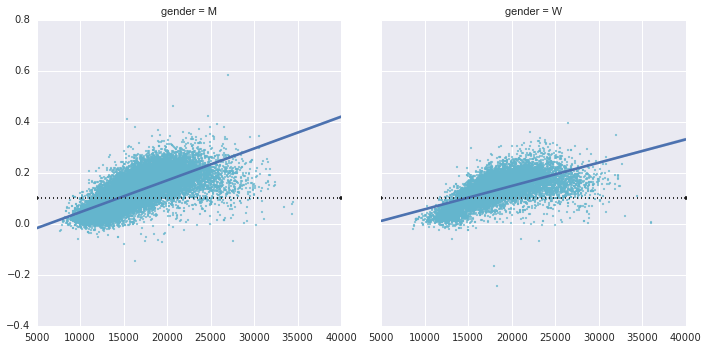

In [49]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=nyc_data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15000 sec, or about 4 hours. People slower than that are much less likely to have a fast second split.

I would hypothesize that you could describe the distribution of runners with a two-component Gaussian distribution: there are the *elite* runners who are in shape and have fast splits, and there are the *casual* runners who are less in shape and tend to tire out more. When we get to *Unsupervised Machine Learning*, we'll have a chance to test this theory out.